In [4]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [5]:
path = 'TMN'
folder_name = []
folder_paths  =[]
for root, folder, files in os.walk(path):
    folder_name.extend(folder)
    full_paths = [path+'/'+ f for f in folder]
    folder_paths.extend(full_paths)
print(folder_name)
print(folder_paths)

['Maahi', 'Mostafijur', 'Nura', 'Tauhid']
['TMN/Maahi', 'TMN/Mostafijur', 'TMN/Nura', 'TMN/Tauhid']


In [6]:
folder_path=[]
for i in folder_paths:
    folder_path.append(i+'/')
folder_path

['TMN/Maahi/', 'TMN/Mostafijur/', 'TMN/Nura/', 'TMN/Tauhid/']

In [7]:
persons = [[] for _ in folder_path]
for i in range(len(folder_path)):
    for _, _, file_name in os.walk(folder_path[i]):
        persons[i].extend(file_name)

In [8]:
person_1=[]
person_2=[]
person_3=[]
person_4=[]
for i in range(len(persons)):
    for j in range(len(persons[i])):
        if(i == 0):
            person = persons[i][j]
            label = folder_name[i]
            classification=0
            person_1.append([person, label,classification])
        elif(i == 1):
            person = persons[i][j]
            label = folder_name[i]
            classification=1
            person_2.append([person, label, classification])
        elif(i == 2):
            person = persons[i][j]
            label = folder_name[i]
            classification=2
            person_3.append([person, label, classification])
        elif(i == 3):
            person = persons[i][j]
            label = folder_name[i]
            classification=3
            person_4.append([person, label, classification])

In [9]:
full_data = []
for i in range(4):
    if i == 0:
        for i in range(len(person_1)):
            full_data.append(person_1[i])
    elif i == 1:
        for i in range(len(person_2)):
            full_data.append(person_2[i])
    elif i == 2:
        for i in range(len(person_3)):
            full_data.append(person_3[i])
    elif i == 3:
        for i in range(len(person_4)):
            full_data.append(person_4[i])

In [10]:
print(len(person_1), len(person_2), len(person_3), len(person_4))

215 202 203 202


In [11]:
random.shuffle(full_data)
len(full_data)


822

(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)


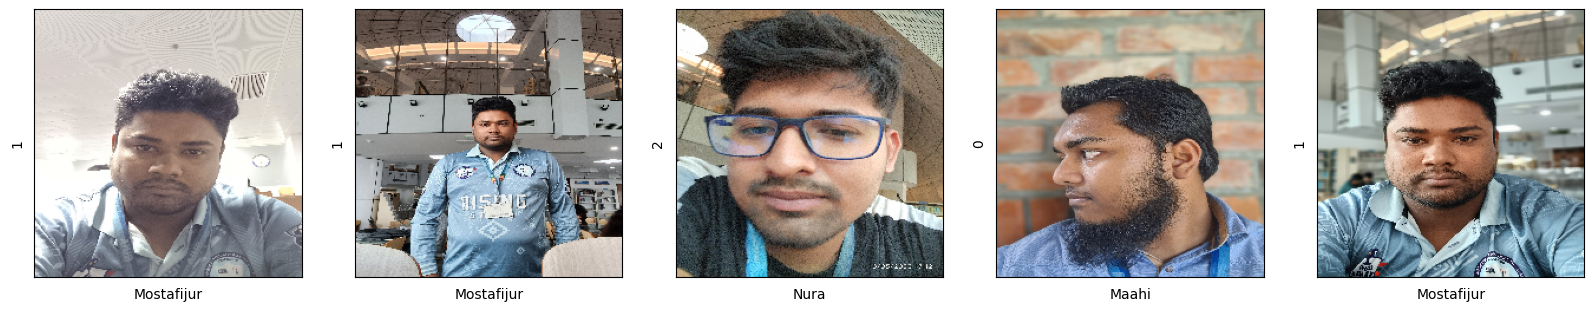

In [12]:
plt.figure(figsize=(20,10))
c=0
for i in range(5):
    plt.subplot(1,5,c+1)
    if(full_data[i][2] == 0):
        img_path = os.path.join(folder_path[0], full_data[i][0])
    elif(full_data[i][2]==1):
        img_path = os.path.join(folder_path[1], full_data[i][0])
    elif(full_data[i][2]==2):
        img_path = os.path.join(folder_path[2], full_data[i][0])
    elif(full_data[i][2]==3):
        img_path = os.path.join(folder_path[3], full_data[i][0])
    
    image = cv2.imread(img_path)
    image = cv2.resize(image, (227,227))
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(full_data[i][1])
    plt.ylabel(full_data[i][2])
    c+=1

In [13]:
len(full_data)

822

In [14]:

test_size = round((len(full_data)*.15))

test_data = random.sample(full_data, test_size)

train_data = [data for data in full_data if data not in test_data]

print(f"Test Data ({test_size} samples): {test_data}")
print(f"Train Data ({len(train_data)} samples): {train_data}")


Test Data (123 samples): [['Maahi_0180.jpg', 'Maahi', 0], ['nura_208.jpg', 'Nura', 2], ['nura_198.jpg', 'Nura', 2], ['nura_172.jpg', 'Nura', 2], ['Maahi_00120.jpg', 'Maahi', 0], ['Maahi_0150.jpg', 'Maahi', 0], ['tauhid_171.jpg', 'Tauhid', 3], ['nura_68.jpg', 'Nura', 2], ['Maahi_13.jpg', 'Maahi', 0], ['nura_7.jpg', 'Nura', 2], ['tauhid_34.jpg', 'Tauhid', 3], ['nura_124.jpg', 'Nura', 2], ['nura_133.jpg', 'Nura', 2], ['nura_96.jpg', 'Nura', 2], ['tauhid_280.jpg', 'Tauhid', 3], ['Mostafij_23.jpg', 'Mostafijur', 1], ['Mostafij_86.jpg', 'Mostafijur', 1], ['tauhid_275.jpg', 'Tauhid', 3], ['nura_100.jpg', 'Nura', 2], ['tauhid_311.jpg', 'Tauhid', 3], ['nura_105.jpg', 'Nura', 2], ['Mostafij_15.jpg', 'Mostafijur', 1], ['nura_106.jpg', 'Nura', 2], ['Maahi_00064.jpg', 'Maahi', 0], ['Mostafij_145.jpg', 'Mostafijur', 1], ['nura_94.jpg', 'Nura', 2], ['tauhid_245.jpg', 'Tauhid', 3], ['tauhid_23.jpg', 'Tauhid', 3], ['tauhid_221.jpg', 'Tauhid', 3], ['Maahi_0153.jpg', 'Maahi', 0], ['tauhid_53.jpg', 'Tauhi

In [15]:
image_shape=(227,227)

# Train Data

In [16]:

X_train = []
Y_train=[]
for data in train_data:
    label = data[2]  
    Y_train.append(label)
    if label == 0:
        img_path = os.path.join(folder_path[0], data[0])
    elif label == 1:
        img_path = os.path.join(folder_path[1], data[0])
    elif label == 2:
        img_path = os.path.join(folder_path[2], data[0])
    elif label == 3:
        img_path = os.path.join(folder_path[3], data[0])
    else:
        continue  
    image = cv2.imread(img_path)
    image = cv2.resize(image,image_shape)
    if image is not None:  
        X_train.append(image)

X_train = np.array(X_train)
Y_train=np.array(Y_train)
Y_train = np.reshape(Y_train, (-1, 1))
print(f"Shape of X is : {X_train.shape}")
print(f"Shape of Y is : {Y_train.shape}")

Shape of X is : (699, 227, 227, 3)
Shape of Y is : (699, 1)


# Test Data

In [17]:
X_test =[]
Y_test=[]
for data in test_data:
    label = data[2]
    if label == 0:
        img_path = os.path.join(folder_path[0],data[0])
    elif label == 1:
        img_path = os.path.join(folder_path[1],data[0])
    elif label == 2:
        img_path = os.path.join(folder_path[2],data[0])
    elif label == 3:
        img_path = os.path.join(folder_path[3],data[0])
    image = cv2.imread(img_path)
    image = cv2.resize(image, image_shape)
    X_test.append(image)
    Y_test.append(label)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test, (-1,1))

In [18]:

print(f"Shape of X is : {X_test.shape}")
print(f"Shape of Y is : {Y_test.shape}")

Shape of X is : (123, 227, 227, 3)
Shape of Y is : (123, 1)


In [19]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU : {len(gpu_device)}")

Number of GPU : 1


In [20]:
#(X_train, Y_train),(X_test, Y_test) = cifar100.load_data()

In [21]:
print(f"Shape of Train data : {X_train.shape} and label : {Y_train.shape}")
print(f"Shape of Test data : {X_test.shape} and label : {Y_test.shape}")

Shape of Train data : (699, 227, 227, 3) and label : (699, 1)
Shape of Test data : (123, 227, 227, 3) and label : (123, 1)


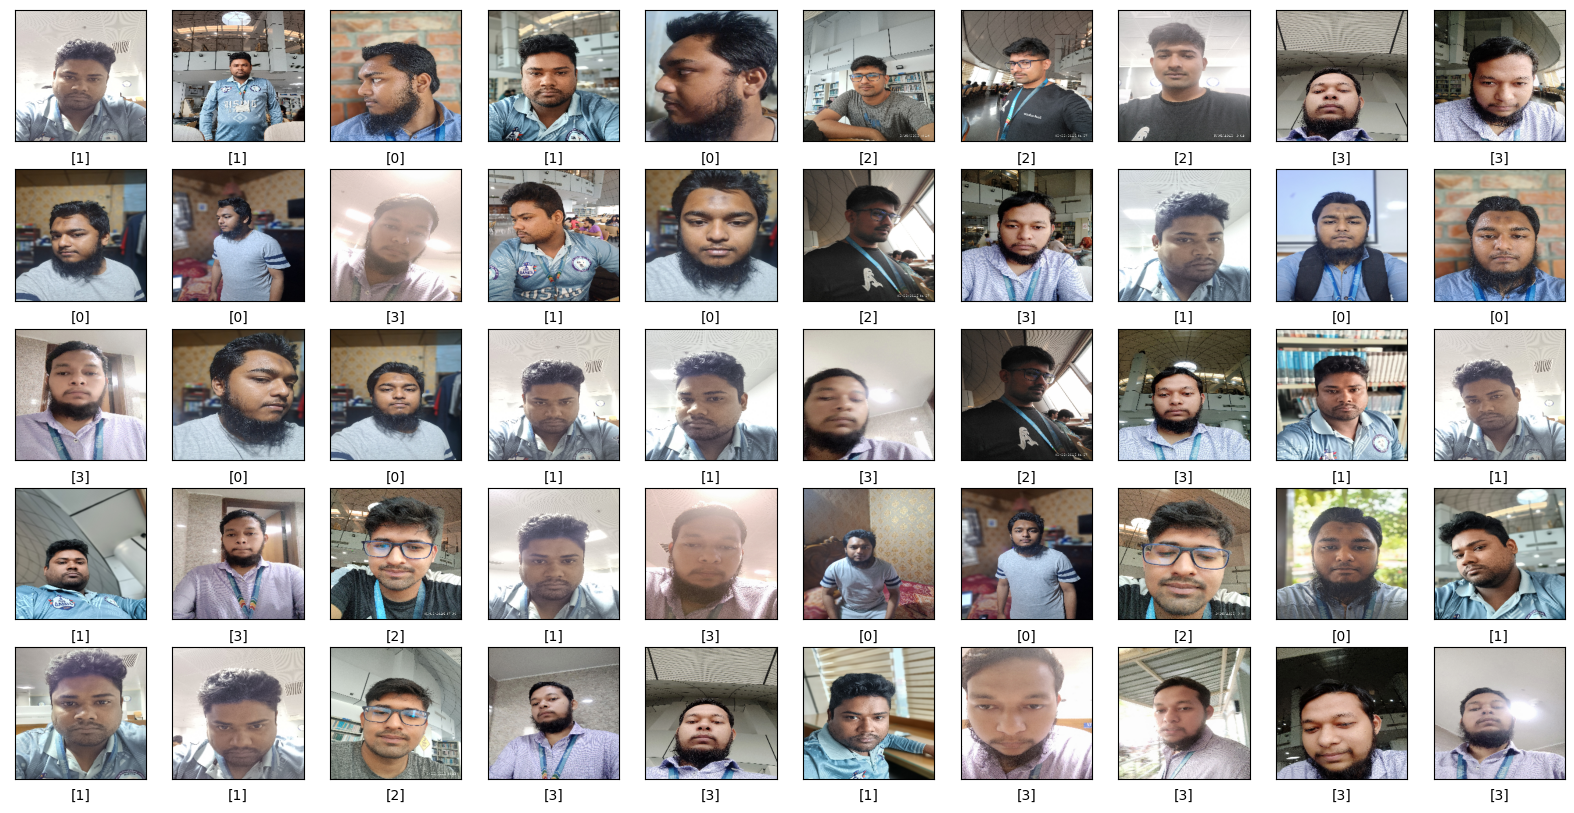

In [22]:
i = 0
plt.figure(figsize=(20,10))
for img in range(50):
    plt.subplot(5, 10, i+1)
    image = cv2.cvtColor(X_train[img],cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xlabel(Y_train[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

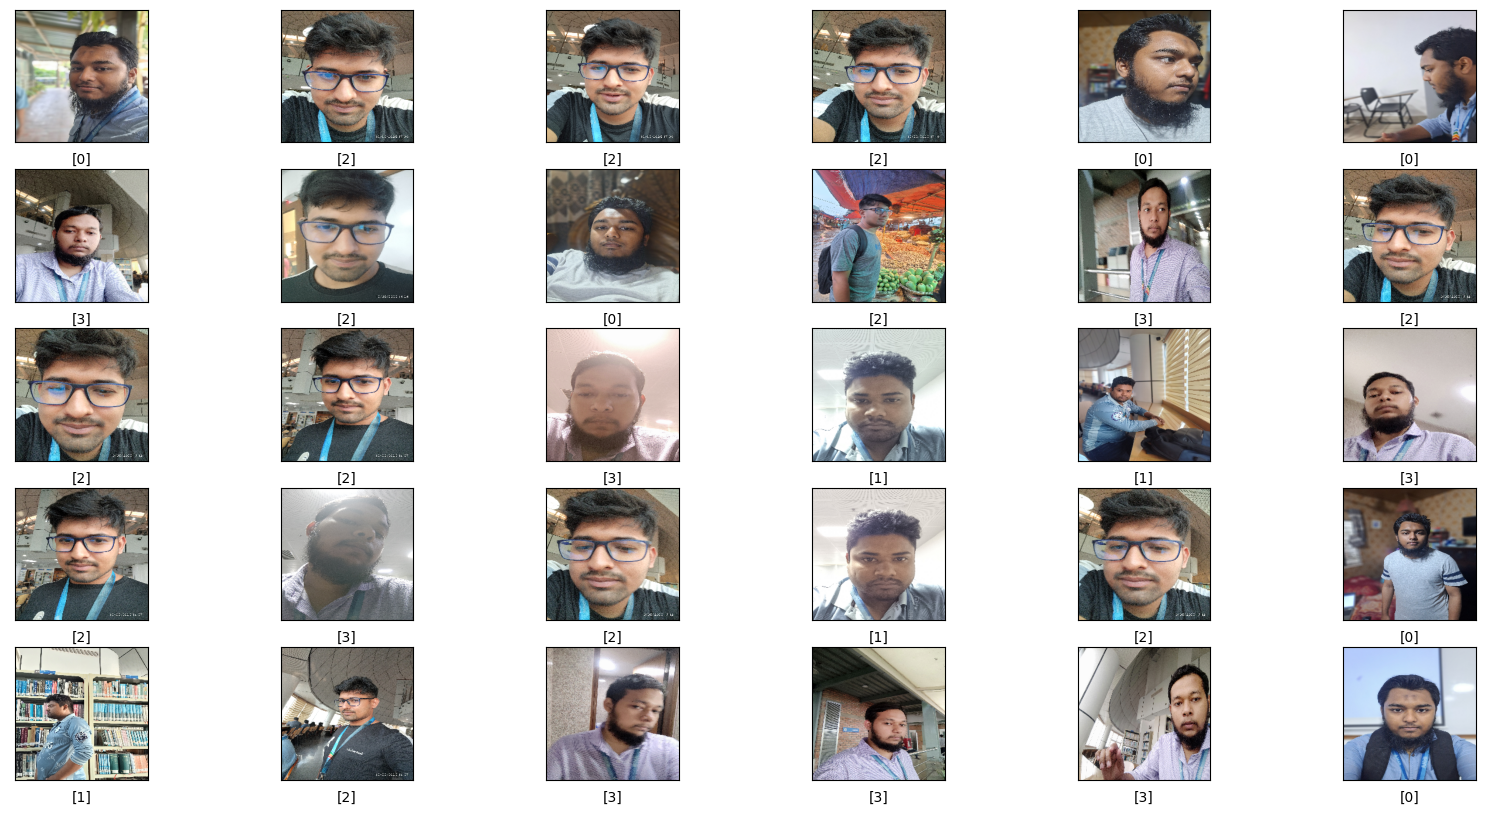

In [23]:
i = 0
plt.figure(figsize=(20,10))
for img in range(30):
    plt.subplot(5, 6, i+1)
    image = cv2.cvtColor(X_test[img],cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xlabel(Y_test[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

In [24]:
train_mean = np.mean(X_train, axis=0)
test_mean = np.mean(X_test, axis=0)
train_mean.shape, test_mean.shape

((227, 227, 3), (227, 227, 3))

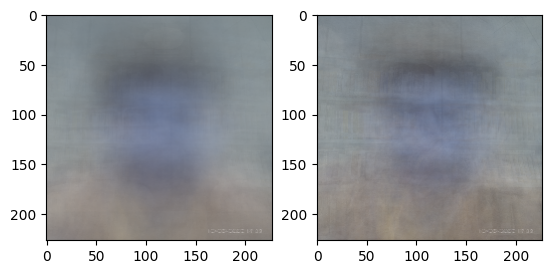

In [25]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_mean.astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(test_mean.astype('uint8'))
plt.show()


# Substract data by mean value

In [26]:
X_train_norm, X_test_norm = X_train - train_mean, X_test - test_mean

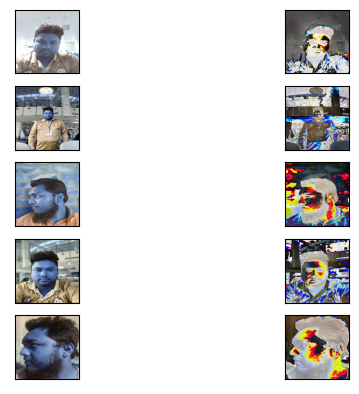

In [27]:
plt.figure()
c =0
for i in range(5):
    plt.subplot(5, 2,c+1 )
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2,c+2 )
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    c+=2

plt.show()

In [43]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=2048),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=1024),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),


    layers.Dense(4),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation_10 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_11 (Activation)  (None, 17, 17, 256)      

In [44]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [45]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,           
    restore_best_weights=True  
)

h = model.fit(
    x=X_train,
    y=Y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=16,
    callbacks=[early_stop]  
)


Epoch 1/20
35/35 [==============================] - 4s 62ms/step - loss: 1.7121 - accuracy: 0.4723 - val_loss: 612.4376 - val_accuracy: 0.2571
Epoch 2/20
35/35 [==============================] - 2s 51ms/step - loss: 1.1863 - accuracy: 0.6422 - val_loss: 82.4586 - val_accuracy: 0.2857
Epoch 3/20
35/35 [==============================] - 2s 51ms/step - loss: 0.9258 - accuracy: 0.6977 - val_loss: 20.8066 - val_accuracy: 0.2000
Epoch 4/20
35/35 [==============================] - 2s 52ms/step - loss: 0.7687 - accuracy: 0.7674 - val_loss: 7.9690 - val_accuracy: 0.3000
Epoch 5/20
35/35 [==============================] - 2s 48ms/step - loss: 0.6640 - accuracy: 0.7996 - val_loss: 14.0978 - val_accuracy: 0.2643
Epoch 6/20
35/35 [==============================] - 2s 51ms/step - loss: 0.5138 - accuracy: 0.8479 - val_loss: 4.3900 - val_accuracy: 0.4571
Epoch 7/20
35/35 [==============================] - 2s 51ms/step - loss: 0.4122 - accuracy: 0.8640 - val_loss: 1.4160 - val_accuracy: 0.6357
Epoch 8/

In [31]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

In [32]:
epoch = range(1, len(val_acc)+1)
epoch

range(1, 15)

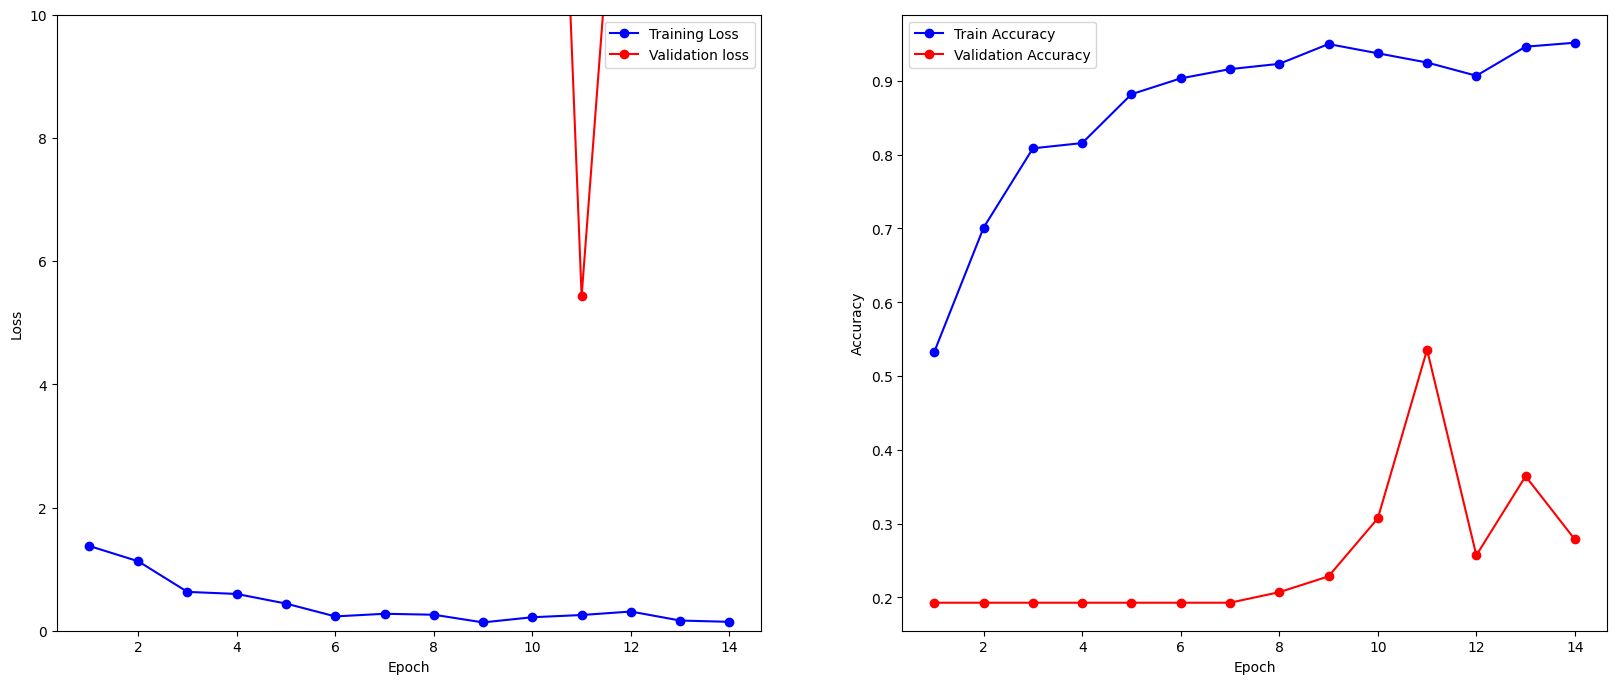

In [33]:
epoch = range(1, len(val_acc)+1)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch, train_loss,'bo-', label='Training Loss')
plt.plot(epoch, val_loss,'ro-', label= 'Validation loss')
plt.ylim(0,10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_acc,'bo-', label='Train Accuracy')
plt.plot(epoch, val_acc,'ro-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

4/4 [==============================] - 1s 290ms/step - loss: 4.2983 - accuracy: 0.5935

Test Accuracy: 0.5934959053993225

Test Loss: 4.298330307006836


In [35]:
probability = model.predict(X_test)

4/4 [==============================] - 0s 11ms/step


In [36]:
(probability[0].max() *100).round(2)

100.0

In [37]:
predicted_classes = probability[0].argmax()
predicted_classes

3

In [38]:
probability[0]

array([3.1268599e-12, 9.7675602e-06, 1.1526405e-11, 9.9999022e-01],
      dtype=float32)

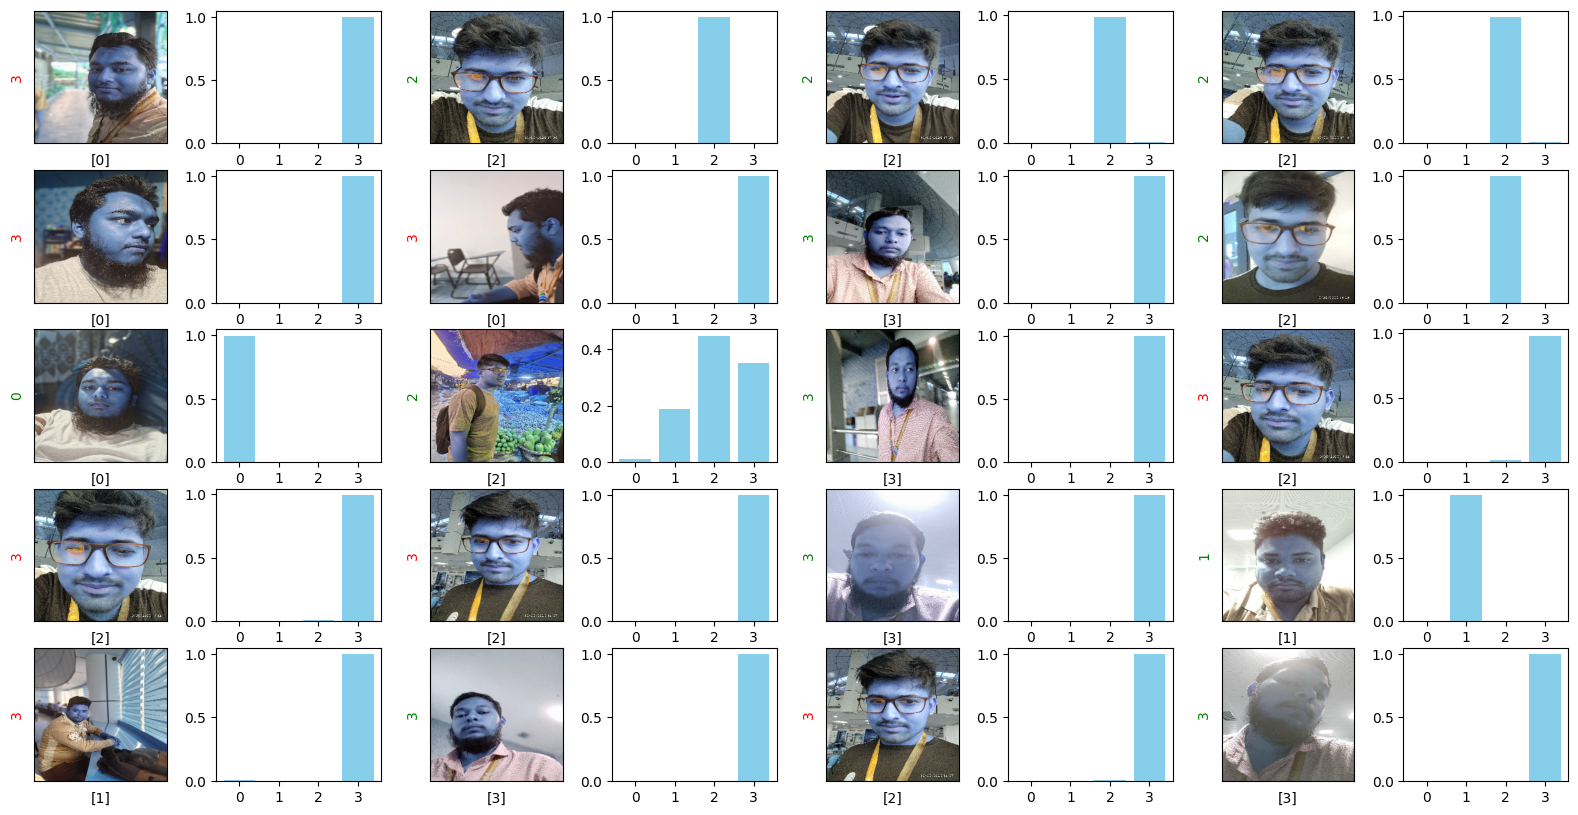

In [39]:
c=0
label=[0,1,2,3]
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,8,c+1)
    plt.imshow(X_test[i])
    plt.xlabel(Y_test[i])
    if(Y_test[i] == probability[i].argmax()):
        plt.ylabel(probability[i].argmax(), color='g')
    else:
        plt.ylabel(probability[i].argmax(), color='r')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,8,c+2)
    plt.bar(range(len(probability[i])), probability[i], color='skyblue')
    plt.xticks(range(len(label)), label)
    c+=2
plt.show()
    

In [40]:
probability[0]

array([3.1268599e-12, 9.7675602e-06, 1.1526405e-11, 9.9999022e-01],
      dtype=float32)

In [41]:
#model.save("model_alxeNet(with 2 new layer).h5")